## Best Time to Buy High Speed Train Ticket in Spain
### Author: Brian Jankowitz
[Medium](https://medium.com/@JankowitzB) | [LinkedIn](https://www.linkedin.com/in/brian-jankowitz/)

## Problem Statement
Buying a high speed train rail ticket can be just as tricky as buying an airplane ticket as prices fluctuate all the time based on multiple facotrs. The factors that make a high speed train ticket fluctuatte can be because of the time, the supply, and the demand. Other factors that decide the cost of a ticket can be because of it's class and ticket type. 

Having prices vary so much, we are tasked with predicitng the ticket prices of the high speed train this way the company an inform their customers when the best time to buy a train ticket is.


## Executive Summary
Our goal is to accuratly predict high speed train prices this way the travel company can inform their customers when they should buy their train tickets. 

This data came from Kaggle. The data was scrapped by the Gurus, a team of data scientists, and the data was uploaded onto Kaggle. 
The data that we obtained came from Kaggle. 

The metrics we decided to use are $r^2$ , Adjusted $r^2$ , and aboluste mean error. $r^2$  was decided as the primary metric because we wanted all the prices to be on the same scale. If a price is €10 but we predict €20, we more than double the price. If we a price is €200 but we predict €210, we are more accurate. We wanted everything to be on the same scale. Adjusted $r^2$  was looked at after as we wanted to look at every indepdent value. This was another was to check our model. The third metric that we looked at was Absolute Mean Squared. This was looked at as we wanted to see how accurate we are to our mean price. 

By making a model to predict the high speed train prices in Spain, we were able to discover that certain features affect the ticket price as well as the time when you buy tickets. 

When looking at the data, we wanted to use this data to make it into a time series model. However, when the data was analyzed more closely, it did not make sense to use this data to make a time series model. Instead, we focused on regression models to predict ticket prices. If this had been discovered very early on, we would have seen if we can get different data for our ticket prices. With little time left for this to be submitted, we were to far ahead with little time left that we had no choice but to continue. An assumption was made that the pricing system is very similiar to airline prices. High speed train tickets in Spain are priced the same way that airlines price their tickets.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Best-Time-to-Buy-High-Speed-Train-Ticket" data-toc-modified-id="Best-Time-to-Buy-High-Speed-Train-Ticket-1">Best Time to Buy High Speed Train Ticket</a></span><ul class="toc-item"><li><span><a href="#Author:-Brian-Jankowitz" data-toc-modified-id="Author:-Brian-Jankowitz-1.1">Author: Brian Jankowitz</a></span></li></ul></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-2">Problem Statement</a></span></li><li><span><a href="#Executive-Summary" data-toc-modified-id="Executive-Summary-3">Executive Summary</a></span></li><li><span><a href="#Loading-Libraries-&amp;-Data" data-toc-modified-id="Loading-Libraries-&amp;-Data-4">Loading Libraries &amp; Data</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-5">Data Cleaning</a></span></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-6">Exploratory Data Analysis (EDA)</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-7">Feature Engineering</a></span></li><li><span><a href="#Model-Preparation" data-toc-modified-id="Model-Preparation-8">Model Preparation</a></span><ul class="toc-item"><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-8.1">Baseline Model</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-8.2">Linear Regression</a></span></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-8.3">Decision Trees</a></span></li><li><span><a href="#Bagging" data-toc-modified-id="Bagging-8.4">Bagging</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-8.5">Random Forest</a></span></li></ul></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-9">Model Selection</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-10">Conclusion</a></span></li><li><span><a href="#Recomendations" data-toc-modified-id="Recomendations-11">Recomendations</a></span></li><li><span><a href="#References" data-toc-modified-id="References-12">References</a></span></li></ul></div>

## Loading Libraries & Data

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
%matplotlib inline

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn import svm 
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,accuracy_score
import timeit
from sklearn import metrics
random_state = 42

We define a functin to take all values from our dataframe divisible by 10. This is so we have less data as we have more 7 million values. This reduces it to about 767,000. The data was checked to make sure we still get a very similiar values. We do this because our dataframe is too big and it takes too long to process on a personal computer.

In [2]:
# Define function
def skipper(i):
    return i%10 != 0

Importing data frame, taking all values divisible by 10.

In [3]:
# Importing data file
renfe = pd.read_csv('dataset/renfe.csv', skiprows = skipper)

In [4]:
# Show dataframe
renfe.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 12:30:00,2019-04-18 15:30:00,AVE,107.70,Turista,Flexible
1,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 20:30:00,2019-04-18 23:40:00,AVE,85.10,Turista,Promo
2,2019-04-11 21:49:48,MADRID,BARCELONA,2019-05-18 15:30:00,2019-05-18 18:40:00,AVE,86.80,Preferente,Promo
3,2019-04-11 21:50:04,MADRID,BARCELONA,2019-05-22 07:20:00,2019-05-22 09:50:00,AVE,100.40,Turista,Promo
4,2019-04-11 21:50:04,MADRID,BARCELONA,2019-05-22 13:25:00,2019-05-22 16:24:00,AVE-TGV,40.95,Turista,Promo


## Data Cleaning

We are going to analyze the dataframe. As can be seen, we have 767,000 values.

In [5]:
# Show dataframe
renfe.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 12:30:00,2019-04-18 15:30:00,AVE,107.70,Turista,Flexible
1,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 20:30:00,2019-04-18 23:40:00,AVE,85.10,Turista,Promo
2,2019-04-11 21:49:48,MADRID,BARCELONA,2019-05-18 15:30:00,2019-05-18 18:40:00,AVE,86.80,Preferente,Promo
3,2019-04-11 21:50:04,MADRID,BARCELONA,2019-05-22 07:20:00,2019-05-22 09:50:00,AVE,100.40,Turista,Promo
4,2019-04-11 21:50:04,MADRID,BARCELONA,2019-05-22 13:25:00,2019-05-22 16:24:00,AVE-TGV,40.95,Turista,Promo


In [6]:
# Show size of dataframe
renfe.shape

(767135, 9)

We drop all the null values for prices, which is about 7% of our data. It is not feasible to go back and input prices for those dates.

In [144]:
final.dtypes

start_date                   object
end_date                     object
price                       float64
start_month_5                 uint8
start_month_6                 uint8
                             ...   
fare_Grupos Ida               uint8
fare_Individual-Flexible      uint8
fare_Mesa                     uint8
fare_Promo                    uint8
fare_Promo +                  uint8
Length: 100, dtype: object

In [7]:
# To show all null values
renfe.isnull().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          57206
train_class     2614
fare            2614
dtype: int64

In [8]:
# Drop nulls for price column
renfe.dropna(subset = ['price'], inplace = True)

We drop the insert_date as the date the data was scrapped is not relevant to us. 

In [9]:
# Remove insert_date column
renfe.drop(columns='insert_date', inplace=True);

In [10]:
# Extra copy of dataframe to be able to go back to it
renfe_original = renfe.copy()

We make a new dataframe that has the start date as the index. The average is taken for each hour in the day. This will be used for graphs later to analyze the prices.

In [11]:
# Make new dataframe with hourly mean for each date
renfe_time = renfe.copy()
renfe_time['start_date'] = pd.to_datetime(renfe_time['start_date'])
renfe_time.set_index('start_date', inplace=True)
renfe_time.sort_index(inplace=True)
renfe_time = renfe_time.resample('h').mean().interpolate(mehtod='time')

This dataframe shows the average prices of tickets for that hour on that day.

In [12]:
# Show dataframe
renfe_time.head()

,price
start_date,
2019-04-12 05:00:00,85.100000
2019-04-12 06:00:00,28.350000
2019-04-12 07:00:00,126.050000
2019-04-12 08:00:00,88.350000
2019-04-12 09:00:00,75.233333


We check for nulls in the data and there are no nulls. There is an average price for each hour.

In [13]:
# Check for nulls
renfe_time.isnull().sum()

price    0
dtype: int64

## Exploratory Data Analysis (EDA)

A picture of the high speed train network in Spain. The cities that we look at are for destination and origin are Madrid, Barcelona, Sevilla, Valencia, and Ponferrada.

<img src="./dataset/train_map.png" alt="drawing" width="600"/>

The bar graphs below show the percentage of people that took trips with that category.

In [14]:
# Function created to show a bar graph
def bar_percentage(dataframe, column, max_values, x_fig, y_fig, title, x_label, y_label):
    unique_values  = dataframe[column].value_counts(normalize=True)
    unique_values = unique_values[:max_values,]
    plt.figure(figsize=(x_fig,y_fig))
    sns.barplot(unique_values.index, unique_values.values, alpha=0.8, palette = ('dark'))
    sns.set(style='darkgrid')
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    plt.show()

We can see that the majority of trips depart and arrive in Madrid. Madrid is the capital and is the most populated of all the cities. It is also the center or hub for the high speed trains in Madrid. Barcelona is the second most populated city but high speed trains that go north to France and join other high speed train networks in Europe start at Barcelona or terminate there. This could have some impact on the number of passengers departing and arriving in Barcelona to other cities in Spain.

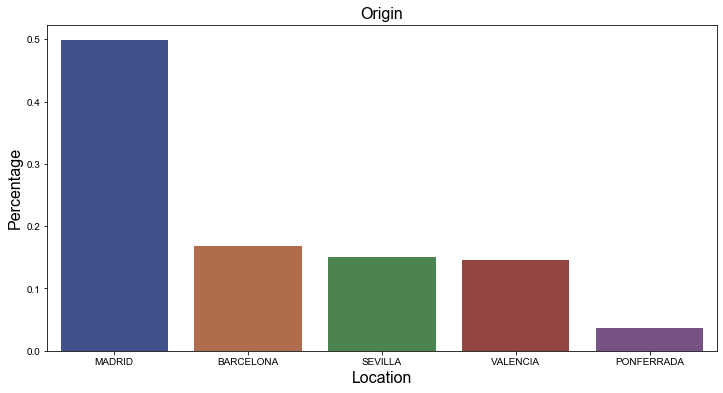

In [15]:
# Create bar graph
bar_percentage(renfe, 'origin', 5, 12, 6, 'Origin', 'Location', 'Percentage')

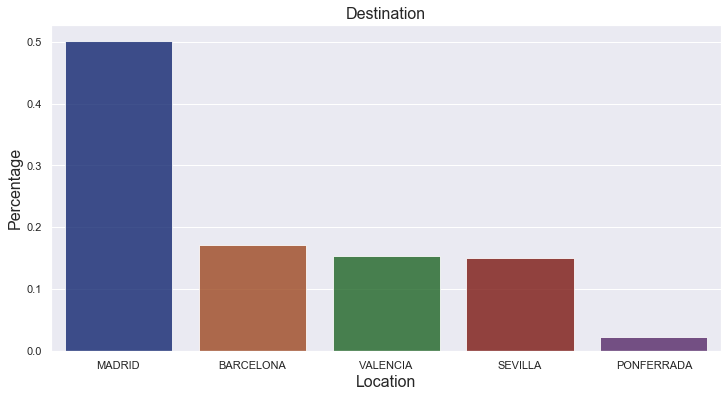

In [16]:
# Create bar graph
bar_percentage(renfe, 'destination', 5, 12, 6, 'Destination', 'Location', 'Percentage')

AVE (Alta Velocidad Española (Spanish High Speed)) is the high speed train service in Spain. There are other train types that run in Spain that are high speed but run at a different speeds. Some of these train types are under different divisions as track gauges are different and there are different eletrification systems. Some trains cannot run on certain tracks and some are limited to just Spain.

The graph below shows that the majority of high speed trains are from AVE. AVE is the main high speed train service provider in Spain.

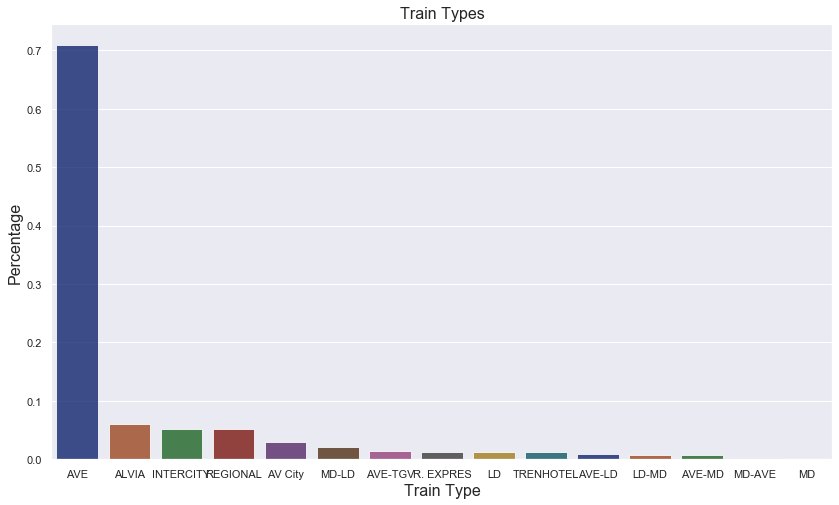

In [17]:
# Create bar graph
bar_percentage(renfe, 'train_type', 15, 14, 8, 'Train Types', 'Train Type', 'Percentage')

Turista is more popular versus the other ticket types because it is economy. More people tend to buy those tickets as they are cheaper. The other ticket classes are more expensive and may come with other options such as seats with more legroom and space.

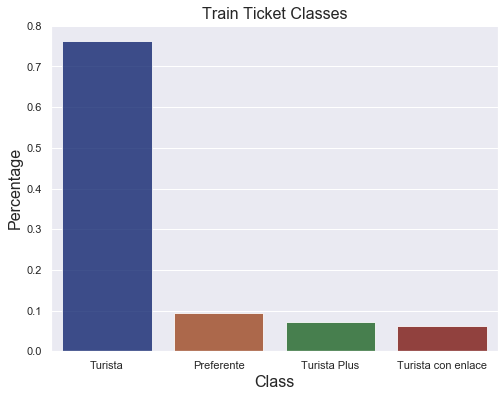

In [18]:
# Create bar graph
bar_percentage(renfe, 'train_class', 4, 8, 6, 'Train Ticket Classes', 'Class', 'Percentage')

Promo is the most popular as it is the cheaper version of the fare type.

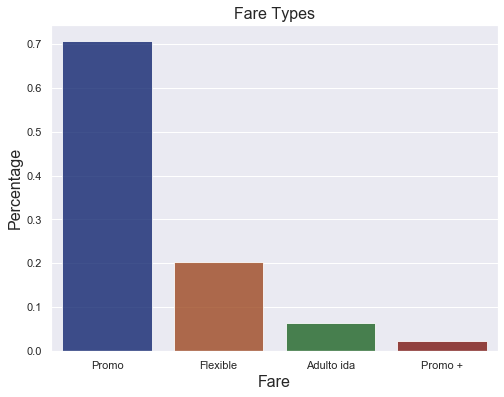

In [19]:
# Create bar graph
bar_percentage(renfe, 'fare', 4, 8, 6, 'Fare Types', 'Fare', 'Percentage')

From all the bar graphs, we can see that we have a good mix of data which will be good for our model.

The box plot will be used to show the price variation for the features in our dataframe.

In [20]:
# Funciton for box plot
def box_plot(dataframe, x, y, title, x_fig, y_fig):
    plt.figure(figsize=(x_fig ,y_fig))
    plt.title(label=title, fontsize=20)
    plt.xlabel(xlabel=x, fontsize=20)
    plt.ylabel(ylabel=y, fontsize=20)
    sns.boxplot(x=x, y=y, data=dataframe, palette = ('dark'))
    sns.set(style='darkgrid')

The box graph prices below show us the price range for each category in the columns. We can see that we have a different range for each graph which is good for our model because each category can has different prices ranges. The box shows us between the 25th and 75th quartile range and the line in the box represents the median. The dots above or below are prices that are outside of that. For example, with train class, most likely the passengers had a very low or high fare. Turista has a lower price because it is economy. Turista plus is economy and comes with extra perks. That is why it costs more. The same can be said for the other train class features.

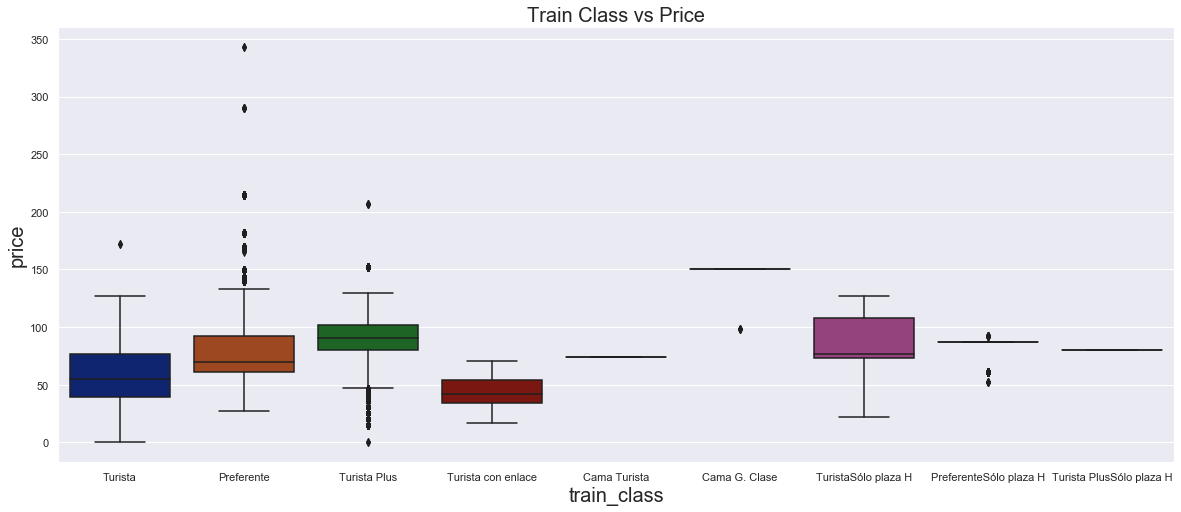

In [21]:
# Create box plot
box_plot(renfe, 'train_class', 'price', 'Train Class vs Price', 20, 8)

This graph shows us that the majority of the tcket prices are €30-€80. These are the prices most passengers pay.

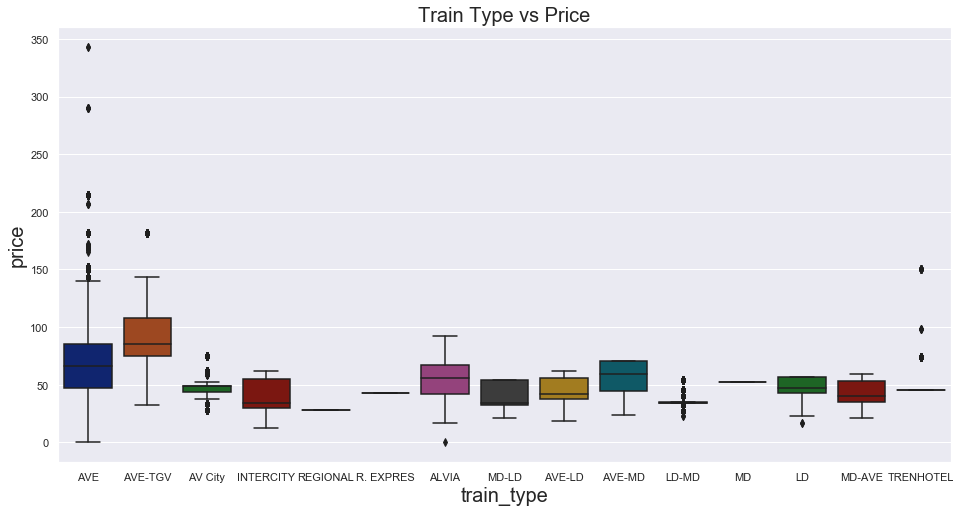

In [22]:
# Create box plot
box_plot(renfe, 'train_type', 'price', 'Train Type vs Price', 16, 8)

We can see that mesa (table) cost more because it is higher class. You get to sit by a table. Promo costs less as it is related to economy (being cheaper).

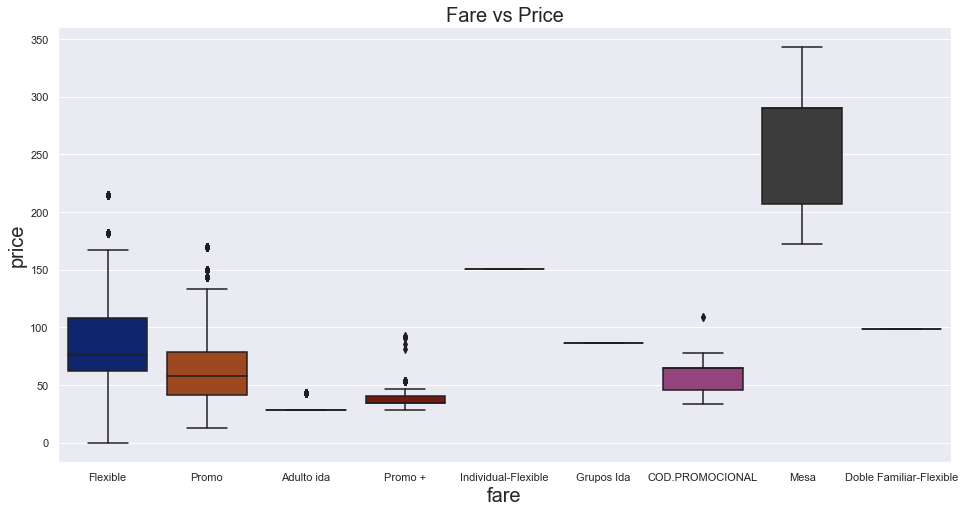

In [23]:
# Create box plot
box_plot(renfe, 'fare', 'price', 'Fare vs Price', 16, 8)

We can see that most of the prices hover around €50. We could not find a reason by Barcelona train tickets cost more. An assumption can be made that is one of the farther cities from Madrid and it is a gateway to high speed train leaving Spain going north. The gateway to other parts in Europe would not affect our data though as we are specifically looking at trains in Spain. Madrid has more prices closer to its median as it is the main city and hub for high speed trains in Spain.

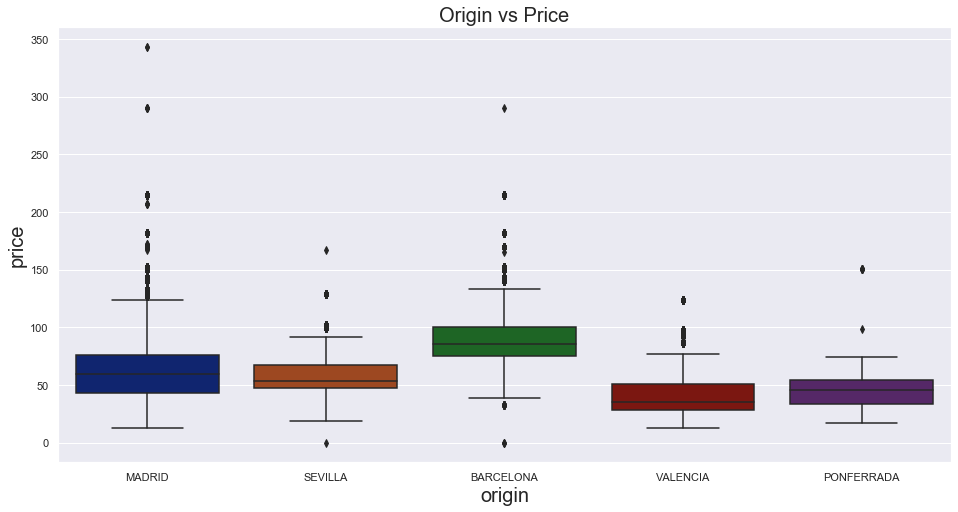

In [24]:
# Create box plot
box_plot(renfe, 'origin', 'price', 'Origin vs Price', 16, 8)

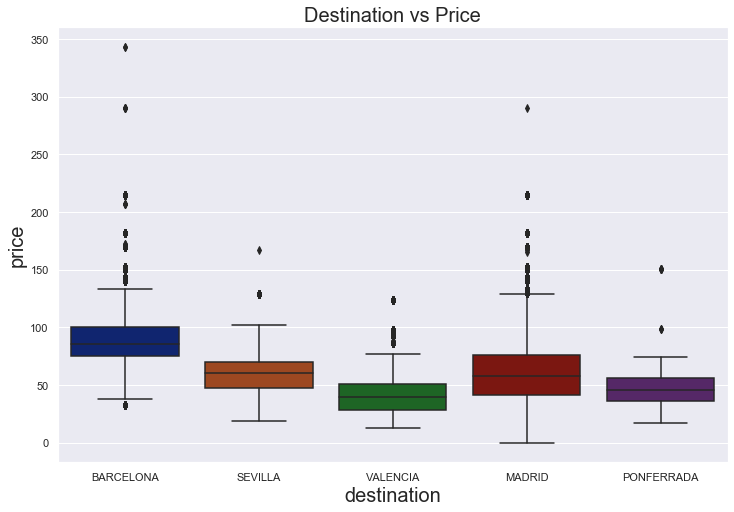

In [25]:
# Create box plot
box_plot(renfe, 'destination', 'price', 'Destination vs Price', 12, 8)

We can see that prices are high from May to July with prices going down slow until September with a small increase. This could be because of the holidays. The prices drop after most likely because demand drops as the summer season is over. The summer season is very popular in Europe for travelers.
We graph 1 day, 7 days, 30 days, and 60 days to get more steady lines and compare them. With more days, there are less bumps but it is easier to interpet. We could miss seasonality. We can see thatthere are small jumps with the 1 days and this could be from certain days. With the 30 days, you can see the average price when the price goes up or down.

Text(0, 0.5, 'Price')

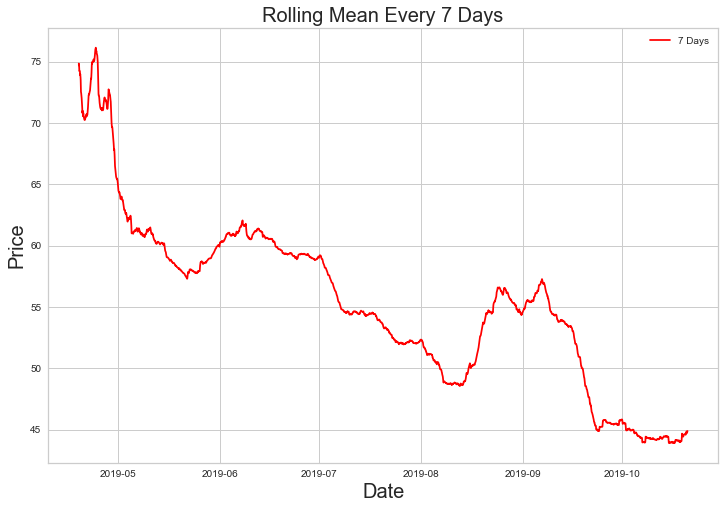

In [116]:
# Line plot
plt.figure(figsize = (12,8))
plt.plot((renfe_time.rolling(168).mean()), label='7 Days', color='red')
plt.legend()
plt.title(label='Rolling Mean Every 7 Days', fontsize=20)
plt.xlabel(xlabel='Date', fontsize=20)
plt.ylabel(ylabel='Price', fontsize=20)

Text(0, 0.5, 'Price')

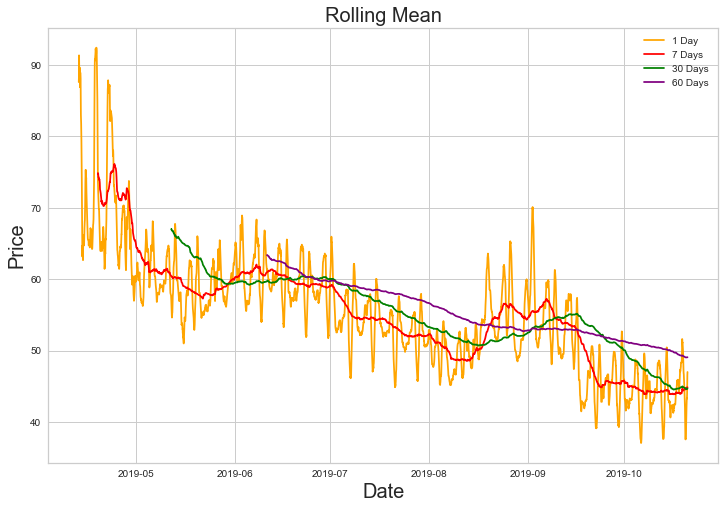

In [117]:
# Line plot
plt.figure(figsize = (12,8))
plt.plot((renfe_time.rolling(24).mean()), label='1 Day', color='orange')
plt.plot((renfe_time.rolling(168).mean()), label='7 Days', color='red')
plt.plot((renfe_time.rolling(720).mean()), label='30 Days', color='green')
plt.plot((renfe_time.rolling(1440).mean()), label='60 Days', color='purple')
plt.legend()
plt.title(label='Rolling Mean', fontsize=20)
plt.xlabel(xlabel='Date', fontsize=20)
plt.ylabel(ylabel='Price', fontsize=20)

## Feature Engineering 

We are making a new dataframe so if we need to look back at our clean one, it is available.

In [28]:
# Make a new dataframe
final = renfe.copy()

We are extracting the dates from our start_date and end_date column. We will use them as features in our model.

In [29]:
# Extract date features
final['start_month'] = pd.DatetimeIndex(final['start_date']).month
final['start_day'] = pd.DatetimeIndex(final['start_date']).weekday_name
final['start_hour'] = pd.DatetimeIndex(final['start_date']).hour

final['end_month'] = pd.DatetimeIndex(final['end_date']).month
final['end_day'] = pd.DatetimeIndex(final['end_date']).weekday_name
final['end_hour'] = pd.DatetimeIndex(final['end_date']).hour

We dummify each date column since it is categorical. The same is done for origin, destination, train type, train class, and fare.

In [31]:
# Making the date columns into colums
final = pd.get_dummies(data=final, columns=['start_month'], drop_first=True)
final = pd.get_dummies(data=final, columns=['start_day'], drop_first=True)
final = pd.get_dummies(data=final, columns=['start_hour'], drop_first=True)

final = pd.get_dummies(data=final, columns=['end_month'], drop_first=True)
final = pd.get_dummies(data=final, columns=['end_day'], drop_first=True)
final = pd.get_dummies(data=final, columns=['end_hour'], drop_first=True)

In [32]:
# Making the date columns into colums
final = pd.get_dummies(data=final, columns=['origin'], drop_first=True)
final = pd.get_dummies(data=final, columns=['destination'], drop_first=True)
final = pd.get_dummies(data=final, columns=['train_type'], drop_first=True)
final = pd.get_dummies(data=final, columns=['train_class'], drop_first=True)
final = pd.get_dummies(data=final, columns=['fare'], drop_first=True)

In [91]:
# Show dataframe
final.head()

,start_date,end_date,price,start_month_5,start_month_6,start_month_7,start_month_8,start_month_9,start_month_10,start_day_Monday,...,train_class_Turista con enlace,train_class_TuristaSólo plaza H,fare_COD.PROMOCIONAL,fare_Doble Familiar-Flexible,fare_Flexible,fare_Grupos Ida,fare_Individual-Flexible,fare_Mesa,fare_Promo,fare_Promo +
0,2019-04-18 12:30:00,2019-04-18 15:30:00,107.70,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2019-04-18 20:30:00,2019-04-18 23:40:00,85.10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2019-05-18 15:30:00,2019-05-18 18:40:00,86.80,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2019-05-22 07:20:00,2019-05-22 09:50:00,100.40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2019-05-22 13:25:00,2019-05-22 16:24:00,40.95,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
# Show size of dataframe
final.shape

(709929, 100)

## Model Preparation

We are developing our model below. We drop the start date and end date because we extracted those values into their own columns. Price is removed from our X as we are using it for our y. Price is our y as that is what we want to predict.

In [34]:
# Prepare our model
X = final.drop(columns=['start_date', 'end_date', 'price'])
y = final['price']
X_train,X_test, y_train, y_test = train_test_split(X, y) #stratify = y)

We write a function to give us the adjusted ${r^2}$.

In [49]:
# Function for adjusted r^2
def adj_r2_score(y_test, y_pred):
    n = X.shape[0]  
    p = X.shape[1]  
    r_squared = metrics.r2_score(y_test, y_pred)
    adj_r2_value = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))
    return adj_r2_value

We write a function to give us the scores we want for each model.

In [50]:
# Function to give us our scores
def scores(y_test, y_pred):
    print('R2 Score: ' + str(metrics.r2_score(y_test, y_pred)))
    print('Adjusted R2 Score: ' + str(adj_r2_score(y_test, y_pred)))
    print('Absolute Mean Squared Error: ' + str(metrics.mean_absolute_error(y_test, y_pred)))

### Baseline Model

Our baseline score is 5.3%.

In [92]:
#Baseline model
print('Train baseline accuracy: ' + str(y_train.value_counts(normalize=True).max()))
print('Test baseline accuracy: ' + str(y_test.value_counts(normalize=True).max()))

Train baseline accuracy: 0.05303448612629262
Test baseline accuracy: 0.0538530450803739


We are running 4 models to see how they compare ${r^2}$ as the metric we want to maximize. We decided this metric as we want to analyze all the prices on the same scale.

### Linear Regression

In [77]:
start = timeit.default_timer()
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Train Score: ' + str(lr.score(X_train, y_train)))
print('Test Score: ' + str(lr.score(X_test, y_test)))
stop = timeit.default_timer()
print('Time Taken: ' + str(stop - start))

Train Score: 0.8536446010060349
Test Score: 0.8529712506272605
Time Taken: 3.8354451549967052


In [78]:
print('Cross val score: ' + str(cross_val_score(lr, X_train, y_train, cv = 3).mean()))

Cross val score: -2.2759696674849692e+18


In [80]:
scores(y_test, y_pred_lr)

R2 Score: 0.8529712506272604
Adjusted R2 Score: 0.8529511588185212
Absolute Mean Squared Error: 7.04589859486542


### Decision Trees

In [81]:
start = timeit.default_timer()
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print('Train Score: ' + str(dt.score(X_train, y_train)))
print('Test Scpre: ' + str(dt.score(X_test, y_test)))
stop = timeit.default_timer()
print('Time Taken: ' + str(stop - start))

Train Score: 0.9540632653869562
Test Scpre: 0.9507572877459893
Time Taken: 9.316114693996496


In [82]:
scores(y_test, y_pred_dt)

R2 Score: 0.9507572877459893
Adjusted R2 Score: 0.9507505586187905
Absolute Mean Squared Error: 3.0274351856253614


### Bagging

In [83]:
start = timeit.default_timer()
bag = BaggingRegressor(n_jobs=-1)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

print('Train Score: ' + str(bag.score(X_train, y_train)))
print('Test Score: ' + str(bag.score(X_test, y_test)))
stop = timeit.default_timer()
print('Time Taken: ' + str(stop - start))

Train Score: 0.9537795705721916
Test Score: 0.9507849294938263
Time Taken: 39.640507670999796


In [84]:
print('Cross val score: ' + str(cross_val_score(bag, X_train, y_train, cv = 3).mean()))

Cross val score: 0.9491365664143543


In [85]:
scores(y_test, y_pred_bag)

R2 Score: 0.9507849294938264
Adjusted R2 Score: 0.9507782041439345
Absolute Mean Squared Error: 3.0357161353993716


### Random Forest

In [86]:
start = timeit.default_timer()
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Train Score: ' + str(rf.score(X_train, y_train)))
print('Test Score: ' + str(rf.score(X_test, y_test)))
stop = timeit.default_timer()
print('Time Score: ' + str(stop - start))

Train Score: 0.9539328915109375
Test Score: 0.9510997539031436
Time Score: 408.1180847380019


In [87]:
print('Cross val score: ' + str(cross_val_score(rf, X_train, y_train, cv = 3).mean()))

Cross val score: 0.9494466685785853


In [88]:
scores(y_test, y_pred_rf)

R2 Score: 0.9510997539031435
Adjusted R2 Score: 0.951093071574714
Absolute Mean Squared Error: 3.032200617112663


## Model Selection

We decided to go with Decision Trees as our metric. This metric performed relatively the same compared to Bagging and Random Forest. Linear Regression performed the poorest. This model performed the best compared to those two and it took the least amount of time to run.

In [100]:
from yellowbrick.regressor import PredictionError

/Users/brianjankowitz/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


The graph below shows the actual targets versus the predicted values. As can be seen, most prices that are not extreme are predicted correctly as extreme prices are not. Extreme price can be a very high or low fare.

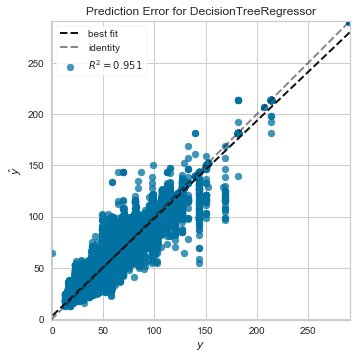

In [108]:
visualizer = PredictionError(dt)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)   
visualizer.show()

## Conclusion

We are able to predict the correct prices of a high speed train ticket in Spain 95% of the time. For the travel company, we are able to provide them a model that shows them that we can predict the prices which the travel company will be able to use to inform their customers when the best time to buy a train ticket is.

## Recomendations

I would recommend that data should be analyzed that containts the prices if a person buy a ticket one week in advance versus one month in advance. By having this data, we are able to predict when the customers should buy a ticket. 

## References

Adjusted $r^2$ https://www.programcreek.com/python/example/89256/sklearn.metrics.r2_score
